# Testing belief

In [1]:
from single_agent import SingleAgent
from IPython.display import SVG, display, HTML
import torch
from torch import distributions
from vh_graph.envs import belief
import pdb
import vh_graph
import gym
import envdataset
import utils_viz
import utils
import sys
from IPython.display import Image
sys.argv = ['-f']

ModuleNotFoundError: No module named 'torch'

In [51]:
curr_env = gym.make('vh_graph-v0')

In [52]:
path_init_env = 'dataset_toy3/init_envs/TrimmedTestScene6_graph_42.json'
goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
gt_state = curr_env.vh_state.to_dict()


utils_viz.print_belief(bel)
utils_viz.print_graph(new_graph)

Edges...


In [53]:
id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
id_goal = 2026
goal_str = 'findnode_{}'.format(id_goal)


### Visualize graph

Edges...


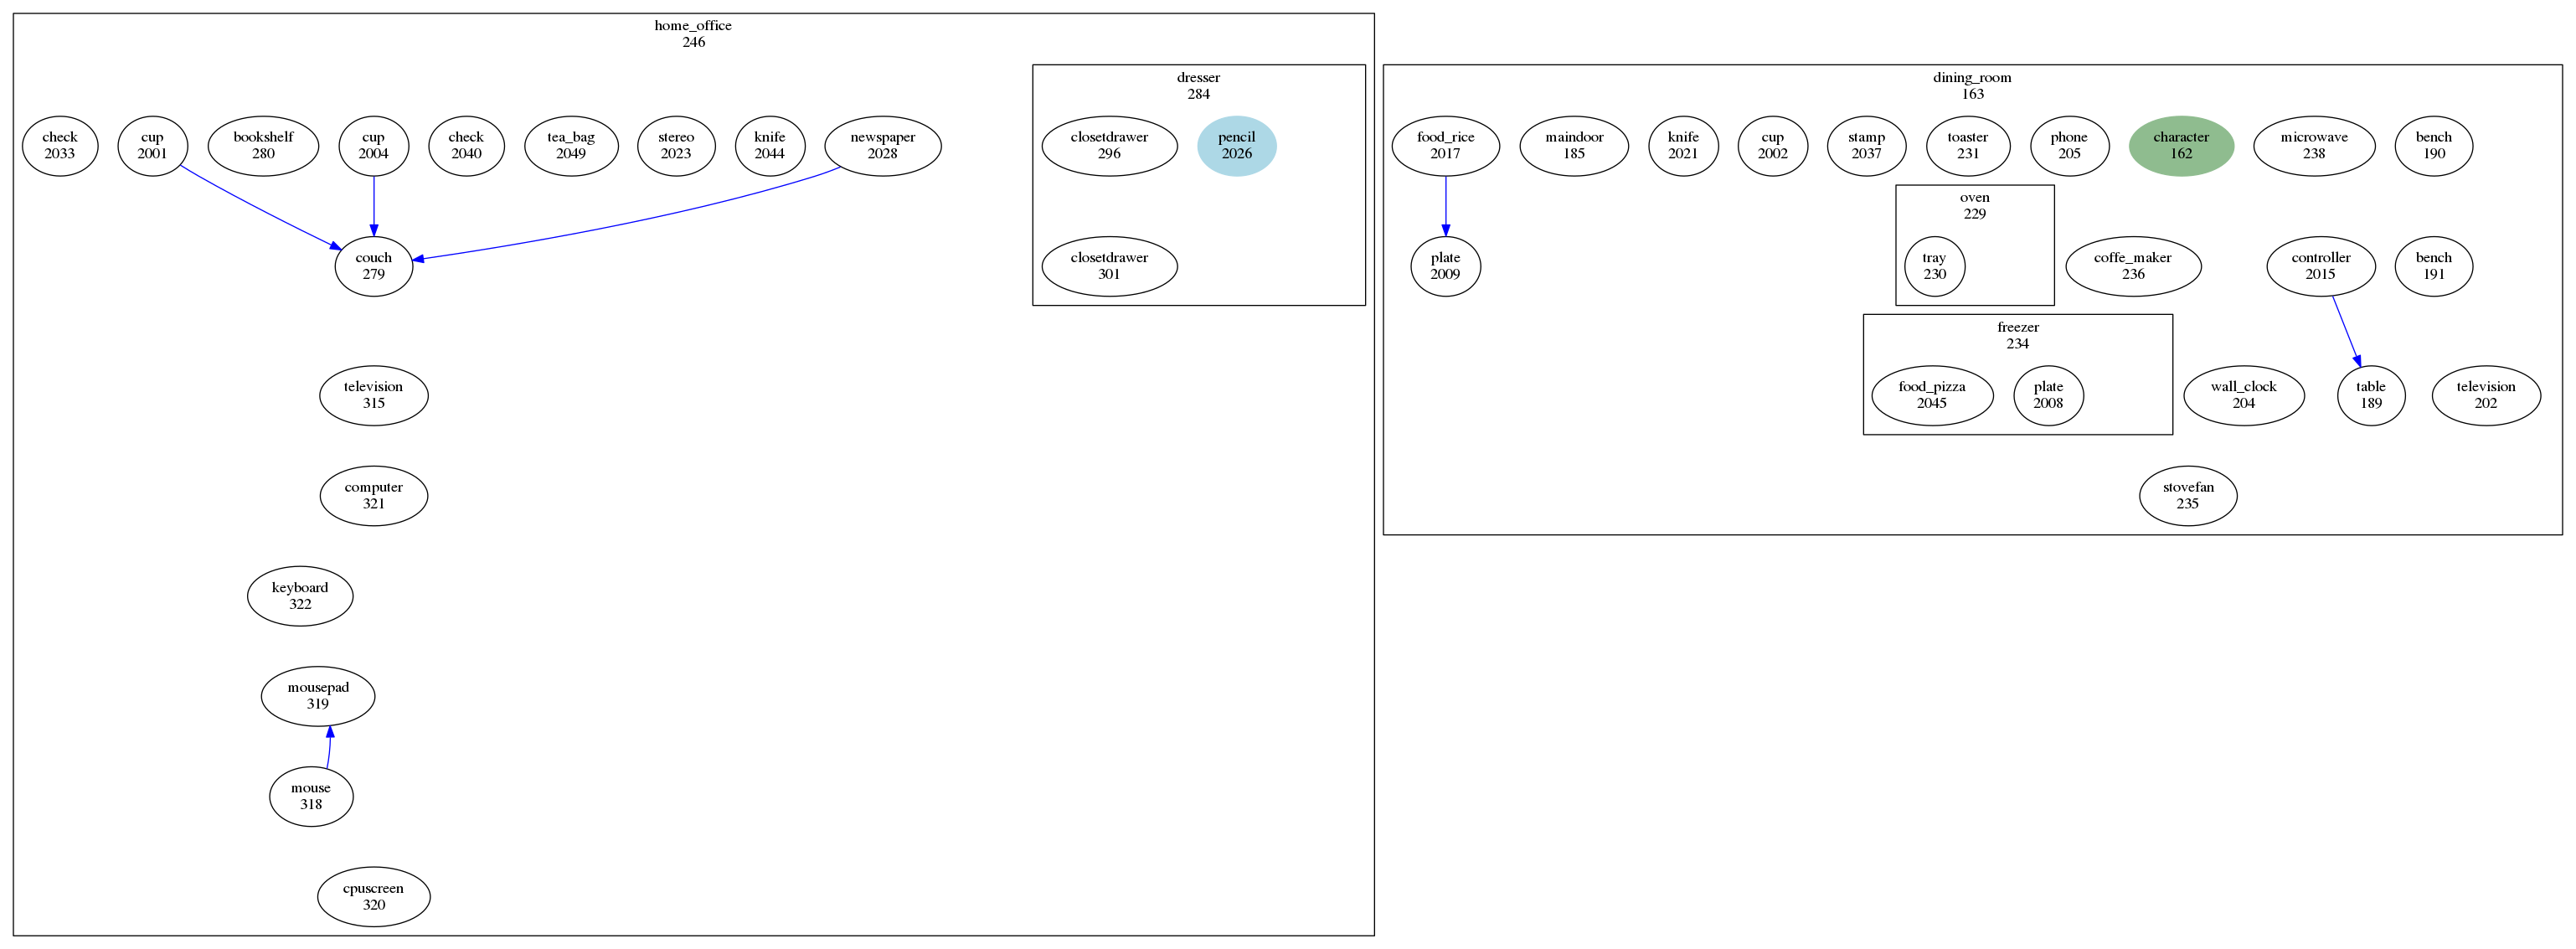

In [54]:
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Visualize Belief

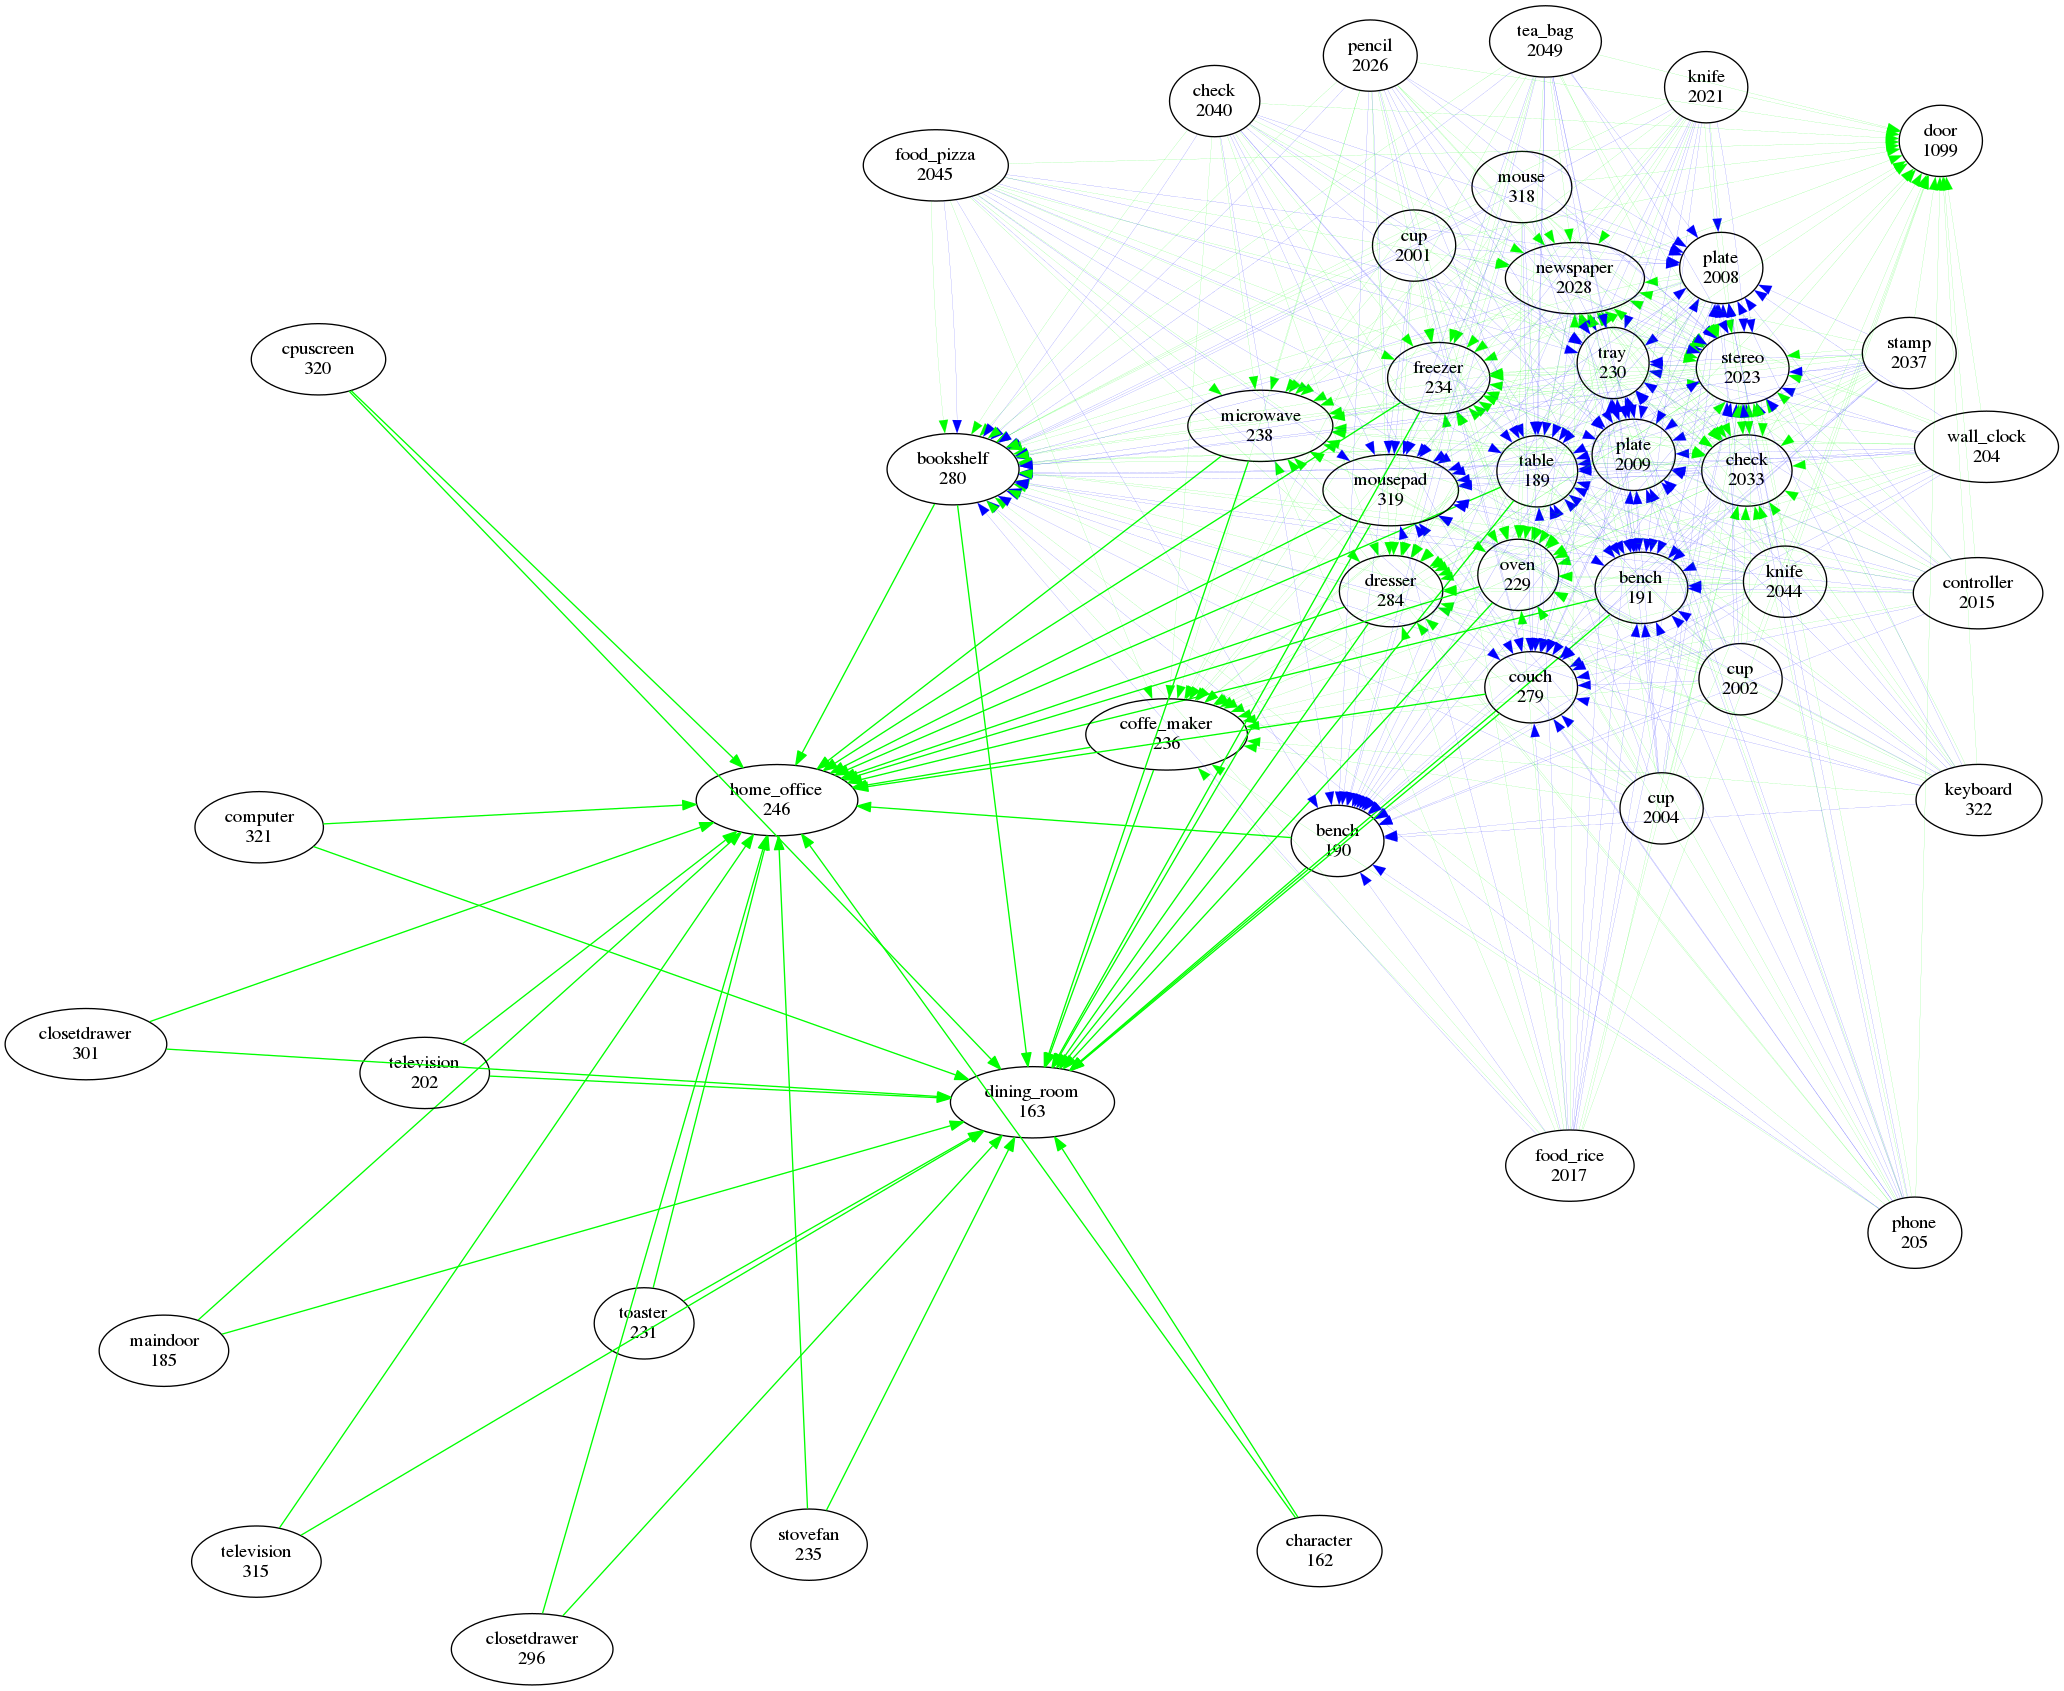

In [55]:
bel = belief.Belief(gt_state)
graph = utils_viz.belief2im(bel, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Visualize sampled belief

Edges...


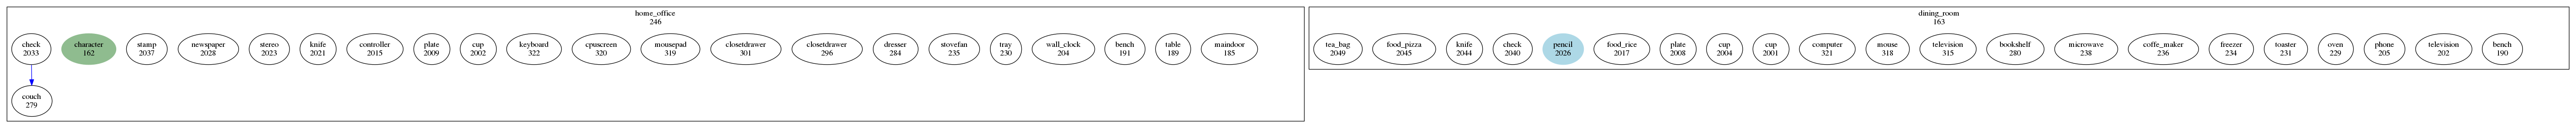

In [56]:

new_graph = bel.sample_from_belief()
graph = utils_viz.graph2im(new_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

## Test belief update

Edges...


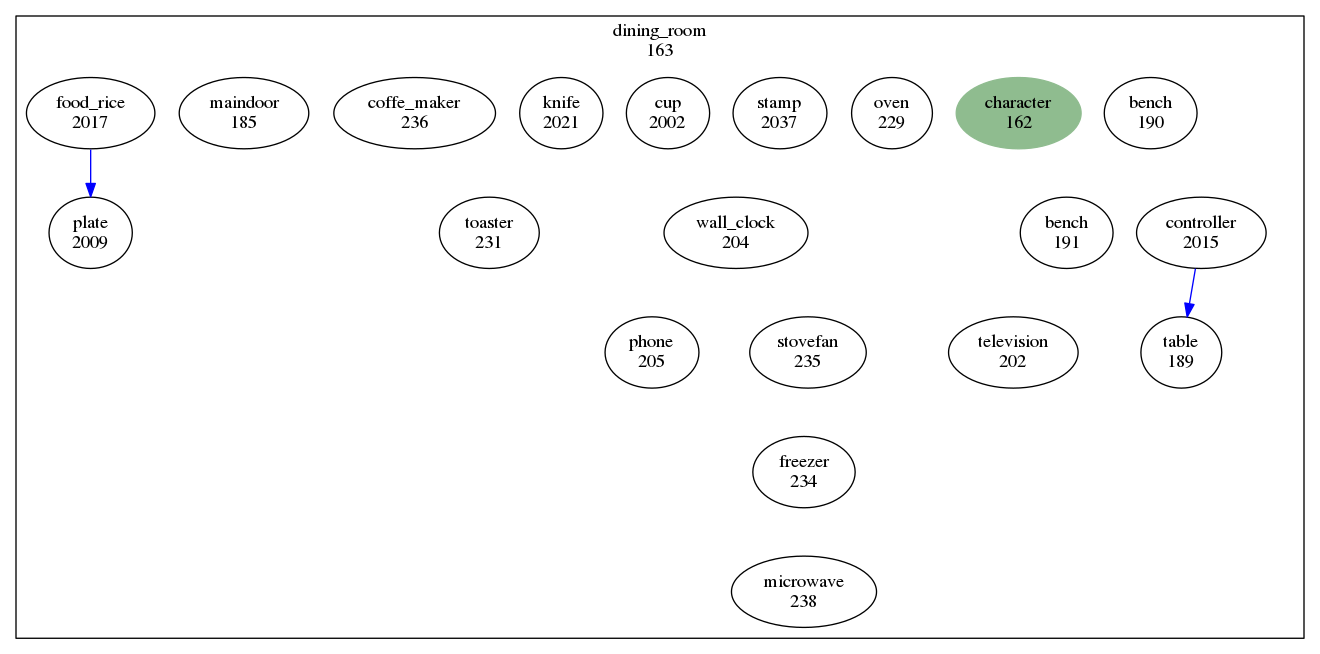

In [57]:
# Check PODMP graph
obs_graph = curr_env.get_observations(0)
graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [77]:
bel.update_from_gt_graph(obs_graph)

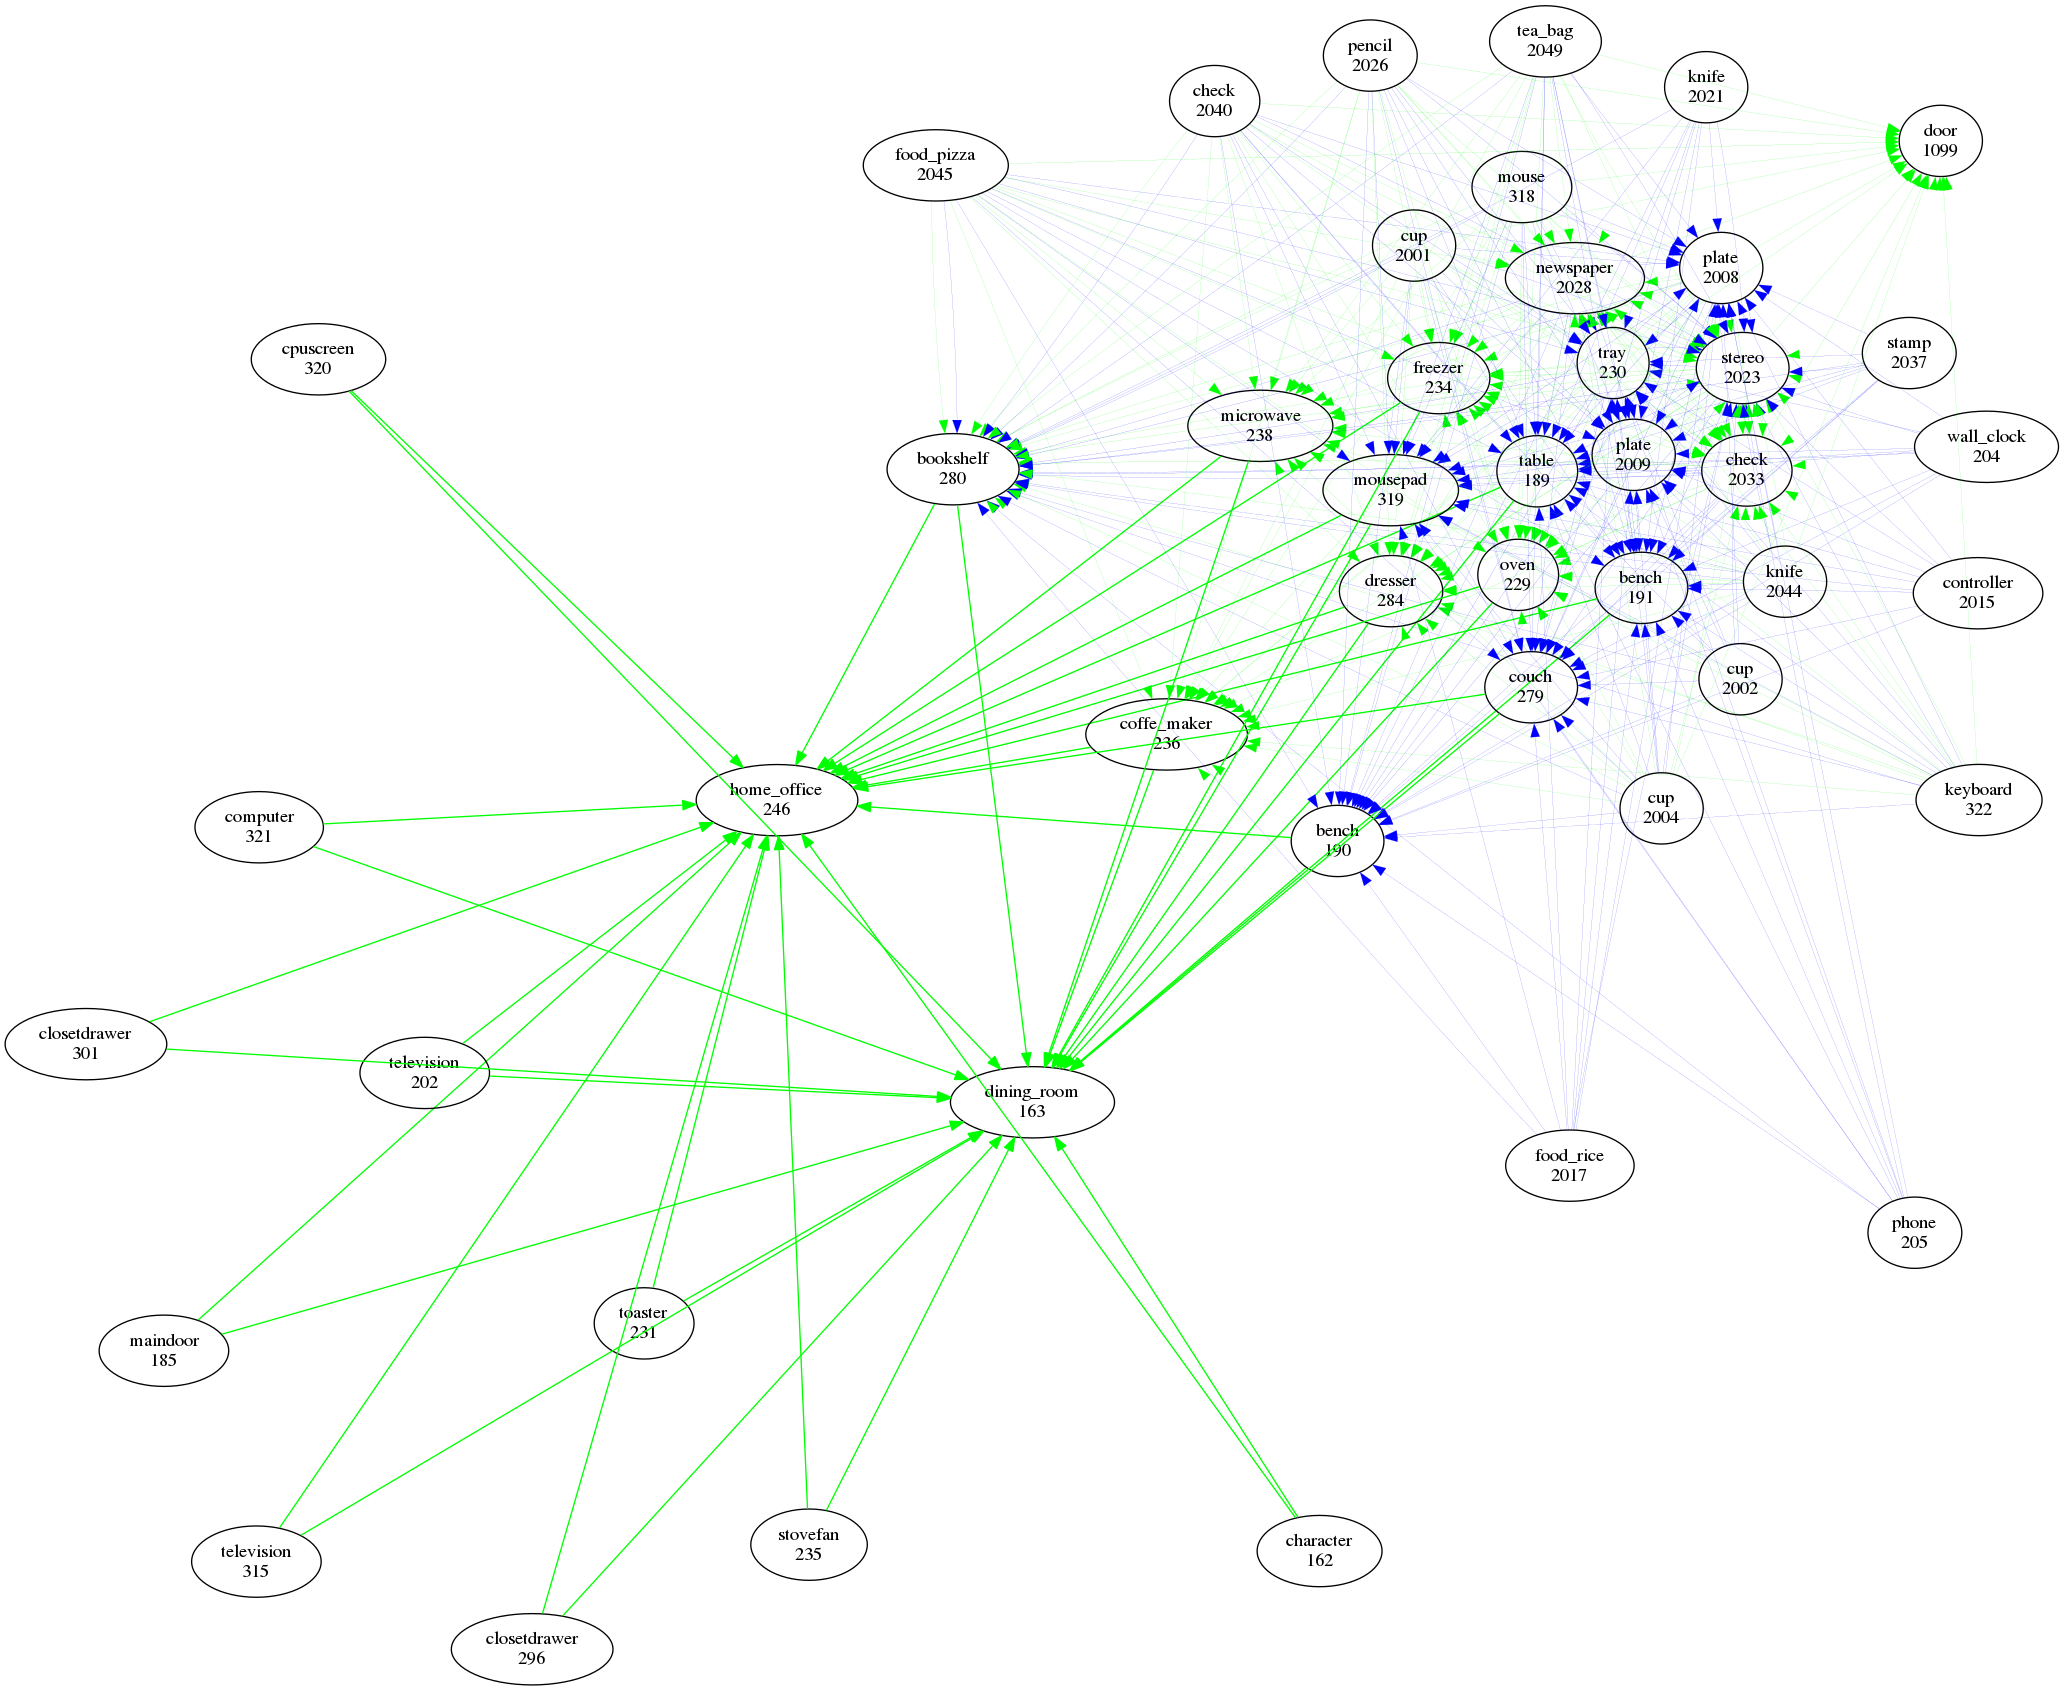

In [78]:
graph = utils_viz.belief2im(bel, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [30]:
%autoreload 2